In [131]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

**Question 2**

In [132]:
a = 1 #semimajor axis 
e = 0.5 #eccentricity
i = 45*np.pi/180 #inclination // radians
mu = 1
n = np.sqrt(mu/(a^3))
M = 0
omega = 0
Omega = 0
l_0 = M
g_0 = omega
h_0 = Omega
time_array = np.linspace(0,100,10000)

L0 = n*a**2
G0 = L0*(1-e**2)**(1/2)
H0 = G0*np.cos(i)


Converting Elements to States

In [133]:
def elem2state(a, e, i, omega, Omega, M):
    #step 1 -- define h
    h = np.sqrt(mu*a*(1-e**2))

    #step 2 -- define E
    def Kepler(E):
        
        return (E - e*np.sin(E) - M)

    E = scipy.optimize.newton(Kepler, 0)

    #step 3 -- define f
    f = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))

    #step 4 -- find theta
    theta = omega + f

    #step 5 -- find the magnitude of r
    r_mag = a*(1-e**2)/(1+(e*np.cos(f)))

    #step 6 -- find position vector
    r = r_mag*np.array([np.cos(theta)*np.cos(Omega) - (np.cos(i)*np.sin(Omega)*np.sin(theta)),
                        np.cos(theta)*np.sin(Omega) + (np.cos(i)*np.cos(Omega)*np.sin(theta)),
                        np.sin(i)*np.sin(theta)])

    #step 7 -- find velocity vector 
    v = -mu/h*np.array([np.cos(Omega)*(np.sin(theta)+(e*np.sin(omega))) + (np.sin(Omega)*(np.cos(theta) + (e*np.cos(omega)))*np.cos(i)),
                        np.sin(Omega)*(np.sin(theta)+(e*np.sin(omega))) - (np.cos(Omega)*(np.cos(theta) + (e*np.cos(omega)))*np.cos(i)),
                        (np.cos(theta) + (e*np.cos(omega)))*-np.sin(i)])
    return r

In [134]:
l_array = 1/L0**3 * time_array + l_0
g_array = g_0 + (time_array*0)
h_array = omega*time_array + h_0
L_array = [L0 for time in time_array]
G_array = [G0 for time in time_array]
H_array = [H0 for time in time_array]

In [135]:
r_list = []

for index in np.arange(len(time_array)):
    a = L_array[index]**(2/3)
    e = np.sqrt(1 - (G_array[index]/L_array[index])**2)
    i = np.arccos(H_array[index]/G_array[index])
    
    M = l_array[index]
    omega = g_array[index]
    Omega = h_array[index]

    r = elem2state(a, e, i, omega, Omega, M)
    r_list.append(r)

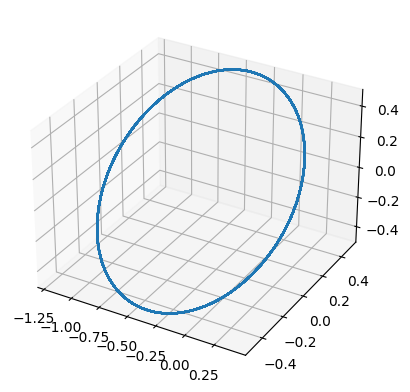

In [136]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x_array = [r_list[n][0] for n in np.arange(len(r_list))]
y_array = [r_list[n][1] for n in np.arange(len(r_list))]
z_array = [r_list[n][2] for n in np.arange(len(r_list))]
ax.plot(x_array, y_array, z_array)
plt.show()